In [1]:
# web scraping gets data from a web page in a format that we can work with
import requests
web_page = requests.get('http://dataquestio.github.io/web-scraping-pages/simple.html')
print(web_page)
print(web_page.status_code)
#a status code that starts with 2  is supposedly successful

<Response [200]>
200


In [2]:
#prints the HTML script
web_page.content

b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'

In [3]:
#using BeautifulSoup library to parse data
from bs4 import BeautifulSoup

In [4]:
soupified = BeautifulSoup(web_page.content,'html.parser')
soupified

<!DOCTYPE html>

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<p>Here is some simple content for this page.</p>
</body>
</html>

In [5]:
list(soupified.children)

['html', '\n', <html>
 <head>
 <title>A simple example page</title>
 </head>
 <body>
 <p>Here is some simple content for this page.</p>
 </body>
 </html>]

In [6]:
for item in list(soupified.children):
    print(type(item))

<class 'bs4.element.Doctype'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>


In [7]:
#you have to index it since the find_all function creates a list
soupified.find_all('p')[0].get_text()

'Here is some simple content for this page.'

In [8]:
web_page_2 = requests.get('http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html')
soupified_2 = BeautifulSoup(web_page_2.content, 'html.parser')
soupified_2

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                First paragraph.
            </p>
<p class="inner-text">
                Second paragraph.
            </p>
</div>
<p class="outer-text first-item" id="second">
<b>
                First outer paragraph.
            </b>
</p>
<p class="outer-text">
<b>
                Second outer paragraph.
            </b>
</p>
</body>
</html>

In [9]:
soupified.find_all('title')[0].get_text()

'A simple example page'

In [10]:
weather = requests.get('https://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168#.XKTv7PZFwdU')
weather_page = BeautifulSoup(weather.content,'html.parser')
days = weather_page.find(id='seven-day-forecast')
days

<div class="panel panel-default" id="seven-day-forecast">
<div class="panel-heading">
<b>Extended Forecast for</b>
<h2 class="panel-title">
	    	    San Francisco CA	</h2>
</div>
<div class="panel-body" id="seven-day-forecast-body">
<div id="seven-day-forecast-container"><ul class="list-unstyled" id="seven-day-forecast-list"><li class="forecast-tombstone">
<div class="tombstone-container">
<p class="period-name">Today<br/><br/></p>
<p><img alt="Today: Showers.  High near 61. Southwest wind around 14 mph.  Chance of precipitation is 80%. New precipitation amounts of less than a tenth of an inch possible. " class="forecast-icon" src="newimages/medium/shra80.png" title="Today: Showers.  High near 61. Southwest wind around 14 mph.  Chance of precipitation is 80%. New precipitation amounts of less than a tenth of an inch possible. "/></p><p class="short-desc">Showers</p><p class="temp temp-high">High: 61 °F</p></div></li><li class="forecast-tombstone">
<div class="tombstone-container">
<p 

In [11]:
forecast = weather_page.find_all(class_="tombstone-container")
Tonight = forecast[0]
Tonight

<div class="tombstone-container">
<p class="period-name">Today<br/><br/></p>
<p><img alt="Today: Showers.  High near 61. Southwest wind around 14 mph.  Chance of precipitation is 80%. New precipitation amounts of less than a tenth of an inch possible. " class="forecast-icon" src="newimages/medium/shra80.png" title="Today: Showers.  High near 61. Southwest wind around 14 mph.  Chance of precipitation is 80%. New precipitation amounts of less than a tenth of an inch possible. "/></p><p class="short-desc">Showers</p><p class="temp temp-high">High: 61 °F</p></div>

In [12]:
#can't apply get_text function to prettified version of script
Day = Tonight.find(class_="period-name").get_text()
Day

'Today'

In [13]:
Temperature = Tonight.find(class_="temp temp-high").get_text()
Temperature

'High: 61 °F'

In [14]:
img = Tonight.find("img")
img['alt']

'Today: Showers.  High near 61. Southwest wind around 14 mph.  Chance of precipitation is 80%. New precipitation amounts of less than a tenth of an inch possible. '

In [15]:
#prints the period name of everything with the tombstone container class
period_tags = days.select(".tombstone-container .period-name")
period_tags 

[<p class="period-name">Today<br/><br/></p>,
 <p class="period-name">Tonight<br/><br/></p>,
 <p class="period-name">Saturday<br/><br/></p>,
 <p class="period-name">Saturday<br/>Night</p>,
 <p class="period-name">Sunday<br/><br/></p>,
 <p class="period-name">Sunday<br/>Night</p>,
 <p class="period-name">Monday<br/><br/></p>,
 <p class="period-name">Monday<br/>Night</p>,
 <p class="period-name">Tuesday<br/><br/></p>]

In [16]:
def lister(liste):
    new_list = []
    count = 0
    for item in liste:
        new_list.append(liste[count].get_text())
        count +=1
    return new_list
lister(period_tags)

['Today',
 'Tonight',
 'Saturday',
 'SaturdayNight',
 'Sunday',
 'SundayNight',
 'Monday',
 'MondayNight',
 'Tuesday']

In [29]:
#selects everything with tombstone container class and temp class
temps_tags = days.select(".tombstone-container .temp")
temp_list = lister(temps_tags)
print(temp_list)
temp_int = []
count=0
for item in temp_list:
    temp_int.append(int(temp_list[count].split()[1]))
    count+=1
print(temp_int)
highz = temp_int[::2]
lowz = temp_int[1::2]
print(highz)
print(lowz)

['High: 61 °F', 'Low: 54 °F', 'High: 64 °F', 'Low: 54 °F', 'High: 67 °F', 'Low: 56 °F', 'High: 67 °F', 'Low: 52 °F', 'High: 63 °F']
[61, 54, 64, 54, 67, 56, 67, 52, 63]
[61, 64, 67, 67, 63]
[54, 54, 56, 52]


In [18]:
print(temps_tags)

[<p class="temp temp-high">High: 61 °F</p>, <p class="temp temp-low">Low: 54 °F</p>, <p class="temp temp-high">High: 64 °F</p>, <p class="temp temp-low">Low: 54 °F</p>, <p class="temp temp-high">High: 67 °F</p>, <p class="temp temp-low">Low: 56 °F</p>, <p class="temp temp-high">High: 67 °F</p>, <p class="temp temp-low">Low: 52 °F</p>, <p class="temp temp-high">High: 63 °F</p>]


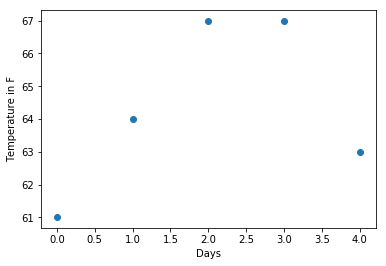

<Figure size 432x288 with 0 Axes>

In [36]:
#data visualization with matplotlib
plt.xlabel('Days')
plt.ylabel('Temperature in F')
import matplotlib.pyplot as plt 
import numpy as np
x = [0,1,2,3,4]
y = highz
plt.scatter(x,y)
plt.show()
fig = plt.figure()
